# Training data obtained from CodaLab

In [243]:
import pandas as pd
import numpy as np

In [244]:
Dataset = pd.read_csv('./Data/CompData/train.csv')

In [245]:
Dataset

,id,text,is_humor,humor_rating,humor_controversy,offense_rating
0,1,TENNESSEE: We're the best state. Nobody even c...,1,2.42,1.0,0.20
1,2,A man inserted an advertisement in the classif...,1,2.50,1.0,1.10
2,3,How many men does it take to open a can of bee...,1,1.95,0.0,2.40
3,4,Told my mom I hit 1200 Twitter followers. She ...,1,2.11,1.0,0.00
4,5,Roses are dead. Love is fake. Weddings are bas...,1,2.78,0.0,0.10
...,...,...,...,...,...,...
7995,7996,Lack of awareness of the pervasiveness of raci...,0,NaN,NaN,0.25
7996,7997,Why are aspirins white? Because they work sorry,1,1.33,0.0,3.85
7997,7998,"Today, we Americans celebrate our independence...",1,2.55,0.0,0.00
7998,7999,How to keep the flies off the bride at an Ital...,1,1.00,0.0,3.00


In [246]:
Dataset['is_humor'].value_counts()

1    4932
0    3068
Name: is_humor, dtype: int64

In [247]:
pos_data = Dataset[Dataset['is_humor']==1].iloc[:3000]
neg_data = Dataset[Dataset['is_humor']==0].iloc[:3000]
data = pd.concat([pos_data,neg_data])
data

,id,text,is_humor,humor_rating,humor_controversy,offense_rating
0,1,TENNESSEE: We're the best state. Nobody even c...,1,2.42,1.0,0.20
1,2,A man inserted an advertisement in the classif...,1,2.50,1.0,1.10
2,3,How many men does it take to open a can of bee...,1,1.95,0.0,2.40
3,4,Told my mom I hit 1200 Twitter followers. She ...,1,2.11,1.0,0.00
4,5,Roses are dead. Love is fake. Weddings are bas...,1,2.78,0.0,0.10
...,...,...,...,...,...,...
7829,7830,working class brown and black folks statistica...,0,NaN,NaN,0.90
7830,7831,"""Blueberry juice boosts memory""",0,NaN,NaN,0.05
7832,7833,"""People have scars in all sorts of unexpected ...",0,NaN,NaN,0.00
7834,7835,Sometimes you gotta forgive them even if they'...,0,NaN,NaN,0.00


In [248]:
text = data['text']
text

0       TENNESSEE: We're the best state. Nobody even c...
1       A man inserted an advertisement in the classif...
2       How many men does it take to open a can of bee...
3       Told my mom I hit 1200 Twitter followers. She ...
4       Roses are dead. Love is fake. Weddings are bas...
                              ...                        
7829    working class brown and black folks statistica...
7830                      "Blueberry juice boosts memory"
7832    "People have scars in all sorts of unexpected ...
7834    Sometimes you gotta forgive them even if they'...
7835    May is National Mental Awareness Month. Please...
Name: text, Length: 6000, dtype: object

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='is_humor', ylabel='count'>

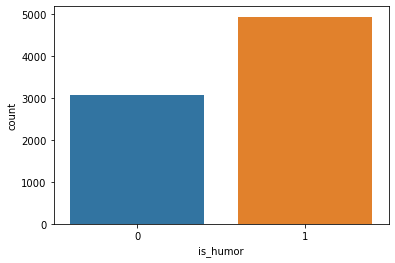

In [250]:
sns.countplot(x='is_humor',data=Dataset)

<AxesSubplot:xlabel='is_humor', ylabel='count'>

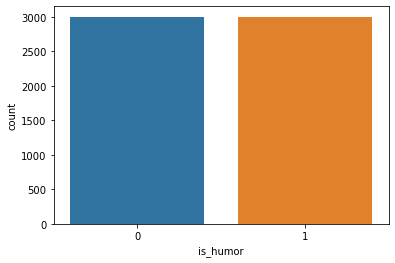

In [251]:
sns.countplot(x='is_humor',data=data)

In [252]:
labels = np.append(np.ones(len(pos_data)),np.zeros(len(neg_data)))

In [253]:
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
nltk.download('stopwords')

def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and word not in string.punctuation):
            stem_word = stemmer.stem(word)
            tweets_clean.append(stem_word)
    return tweets_clean

def build_freqs(tweets, ys):
    yslist = np.squeeze(ys).tolist()
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            freqs[pair] = freqs.get(pair, 0) + 1  
    return freqs

[nltk_data] Downloading package stopwords to C:\Users\TEJ NARAYAN
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [254]:
freq = build_freqs(text,labels)

### Vectorizing 3d for each text

In [255]:
vector = []
for texts in  text:
    x1 = 0
    y1 = 0
    for word in process_tweet(texts):
        x1 += freq.get((word,1),0)
        y1 += freq.get((word,0),0)
    vector.append([1,x1,y1])

In [256]:
len(vector)

6000

In [257]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector,labels,test_size=0.2)

In [258]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

## Evaluating the model

In [259]:
def model_Evaluate(model,X_test,y_test):
    y_pred = model.predict(X_test)
    
    # Classification Report
    print(classification_report(y_test, y_pred))
    
    #Confusion Matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg ','False Pos ', 'False Neg ','True Pos ']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    
    #ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()

# Logistic Regression

In [260]:
LRmodel = LogisticRegression(max_iter=1000)
LRmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [261]:
cvs = cross_val_score(LRmodel,vector,labels,cv=5)
cvs.mean()

0.7955

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80       618
         1.0       0.79      0.80      0.79       582

    accuracy                           0.80      1200
   macro avg       0.80      0.80      0.80      1200
weighted avg       0.80      0.80      0.80      1200



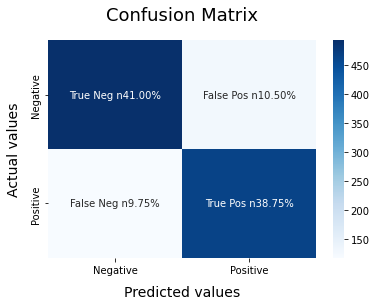

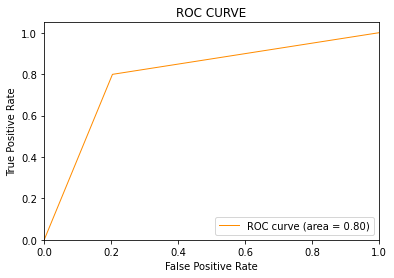

In [262]:
model_Evaluate(LRmodel,X_test,y_test)

# BernoulliNB

In [263]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)

BernoulliNB()

In [264]:
cvs = cross_val_score(BNBmodel,vector,labels,cv=5)
cvs.mean()

0.5006666666666667

              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00       618
         1.0       0.49      1.00      0.65       582

    accuracy                           0.49      1200
   macro avg       0.74      0.50      0.33      1200
weighted avg       0.75      0.49      0.32      1200



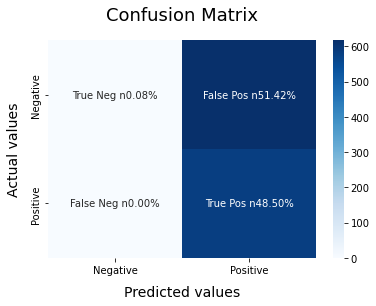

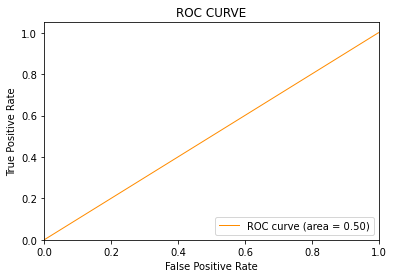

In [265]:
model_Evaluate(BNBmodel,X_test,y_test)

# LinearSVC

In [266]:
SVCmodel = LinearSVC(max_iter=1000)
SVCmodel.fit(X_train, y_train)

C:\Coding\ML\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79       618
         1.0       0.77      0.80      0.79       582

    accuracy                           0.79      1200
   macro avg       0.79      0.79      0.79      1200
weighted avg       0.79      0.79      0.79      1200



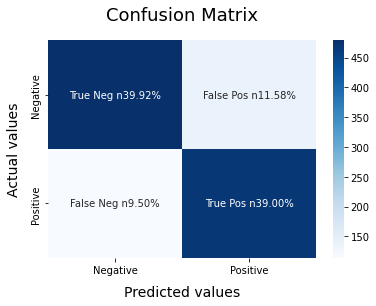

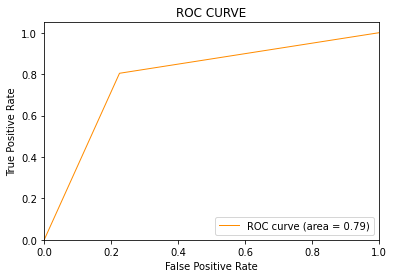

In [267]:
model_Evaluate(SVCmodel,X_test,y_test)

# RandomForestClassifier

              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77       618
         1.0       0.75      0.78      0.76       582

    accuracy                           0.77      1200
   macro avg       0.77      0.77      0.77      1200
weighted avg       0.77      0.77      0.77      1200



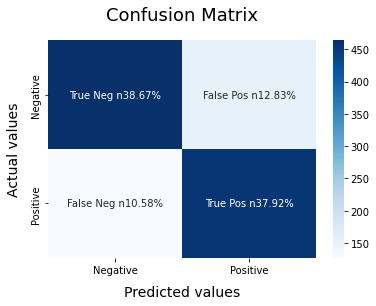

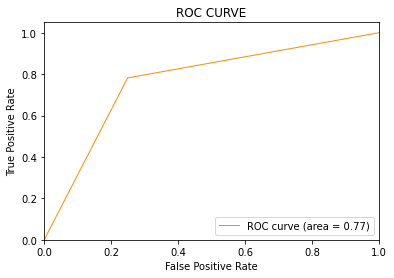

In [273]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)
model_Evaluate(clf,X_test,y_test)